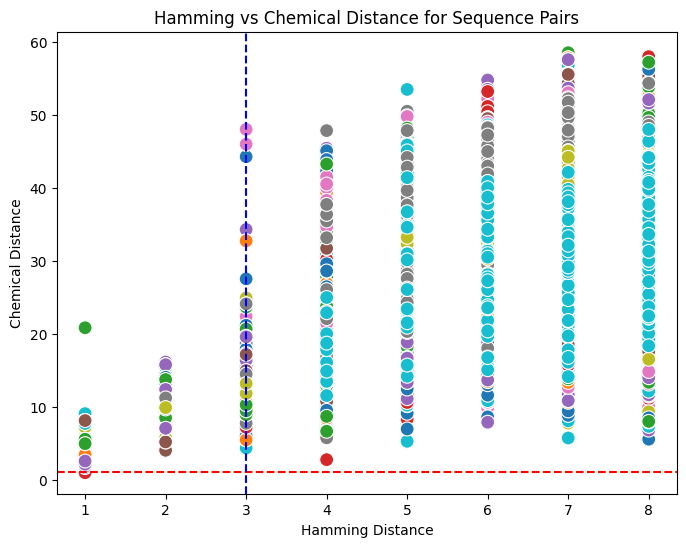

In [6]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Hamming and chemical distance files
with open("./output_files/tests/cdr3/test_ham.json", 'r') as hamming_file:
    hamming_data = json.load(hamming_file)

with open("./output_files/tests/cdr3/test_full.json", 'r') as chemical_file:
    chemical_data = json.load(chemical_file)

# Define thresholds for "low" chemical distance and "high" Hamming distance
low_chemical_threshold = 1
high_hamming_threshold = 3

# Collect distances for visualization
distances = []

for seq in hamming_data:
    hamming_dists = dict(hamming_data.get(seq, []))
    chemical_dists = dict(chemical_data.get(seq, []))
    
    for compared_seq, hamming_dist in hamming_dists.items():
        chemical_dist = chemical_dists.get(compared_seq, None)
        
        if chemical_dist is not None:
            distances.append({
                "hamming_distance": hamming_dist,
                "chemical_distance": chemical_dist,
                "sequence_1": seq,
                "sequence_2": compared_seq
            })

# Create a DataFrame for easier plotting
import pandas as pd
df = pd.DataFrame(distances)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a scatter plot with seaborn
sns.scatterplot(data=df, x='hamming_distance', y='chemical_distance', hue='sequence_1', s=100)

# Add threshold lines for "high" Hamming and "low" chemical distances
plt.axhline(y=low_chemical_threshold, color='r', linestyle='--', label=f'Low Chemical Threshold ({low_chemical_threshold})')
plt.axvline(x=high_hamming_threshold, color='b', linestyle='--', label=f'High Hamming Threshold ({high_hamming_threshold})')

# Add labels and title
plt.xlabel('Hamming Distance')
plt.ylabel('Chemical Distance')
plt.title('Hamming vs Chemical Distance for Sequence Pairs')

# Display legend and plot
plt.legend().remove()
plt.show()


In [2]:
import json

# Load the Hamming and chemical distance files
with open("./output_files/tests/cdr3/test_ham.json", 'r') as hamming_file:
    hamming_data = json.load(hamming_file)

with open("./output_files/tests/cdr3/test_full.json", 'r') as chemical_file:
    chemical_data = json.load(chemical_file)

# Define thresholds for "low" chemical distance and "high" Hamming distance
low_chemical_threshold = 1
high_hamming_threshold = 3

# Find cases where chemical distance is low and Hamming distance is high, or the opposite
significant_differences = []

for seq in hamming_data:
    hamming_dists = dict(hamming_data.get(seq, []))
    chemical_dists = dict(chemical_data.get(seq, []))
    
    for compared_seq, hamming_dist in hamming_dists.items():
        chemical_dist = chemical_dists.get(compared_seq, None)
        
        if chemical_dist is not None:
            if (chemical_dist <= low_chemical_threshold and hamming_dist >= high_hamming_threshold) or \
               (chemical_dist >= high_hamming_threshold and hamming_dist <= low_chemical_threshold):
                significant_differences.append({
                    "sequence_1": seq,
                    "sequence_2": compared_seq,
                    "hamming_distance": hamming_dist,
                    "chemical_distance": chemical_dist
                })

# Print the results
for diff in significant_differences:
    print(diff)


{'sequence_1': 'CASSTRSTGELFF', 'sequence_2': 'CASSVRSTGELFF', 'hamming_distance': 1, 'chemical_distance': 4.051207227481705}
{'sequence_1': 'CASSTGSYGYTF', 'sequence_2': 'CASSTGNYGYTF', 'hamming_distance': 1, 'chemical_distance': 7.206509002283977}
{'sequence_1': 'CASSTGSYGYTF', 'sequence_2': 'CASSTGFYGYTF', 'hamming_distance': 1, 'chemical_distance': 7.700206231004466}
{'sequence_1': 'CASSLMTNQPQHF', 'sequence_2': 'CASSLMANQPQHF', 'hamming_distance': 1, 'chemical_distance': 3.769443725538293}
{'sequence_1': 'CASSLMANQPQHF', 'sequence_2': 'CASSLMTNQPQHF', 'hamming_distance': 1, 'chemical_distance': 3.769443725538293}
{'sequence_1': 'CASSLYSNQPQHF', 'sequence_2': 'CASSQYSNQPQHF', 'hamming_distance': 1, 'chemical_distance': 3.274172567229773}
{'sequence_1': 'CASSLYSNQPQHF', 'sequence_2': 'CASSLYGNQPQHF', 'hamming_distance': 1, 'chemical_distance': 7.71431079228728}
{'sequence_1': 'CASSQYSNQPQHF', 'sequence_2': 'CASSLYSNQPQHF', 'hamming_distance': 1, 'chemical_distance': 3.27417256722977

In [9]:
import networkx as nx
import pandas as pd
from pyvis.network import Network


df = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")
# Create a graph
G = nx.Graph()

# Add nodes to the graph
for cdr3 in df['cdr3'].unique():
    G.add_node(cdr3)

# Add edges between cdr3s that share the same epitope
for epitope in df['epitope.pred'].unique():
    cdr3s = df[df['epitope.pred'] == epitope]['cdr3']
    for i in range(len(cdr3s)):
        for j in range(i + 1, len(cdr3s)):
            G.add_edge(cdr3s.iloc[i], cdr3s.iloc[j])
G.remove_edges_from(nx.selfloop_edges(G))


# # Create Network object
# net = Network(notebook=True)

# # Load networkx graph into pyvis
# net.from_nx(G)

# # Enable options for better visualization
# net.show_buttons(filter_=['physics'])

# # Save and display
# # net.show('graph.html')
# net.save_graph('output_files/chephy_graph.html')

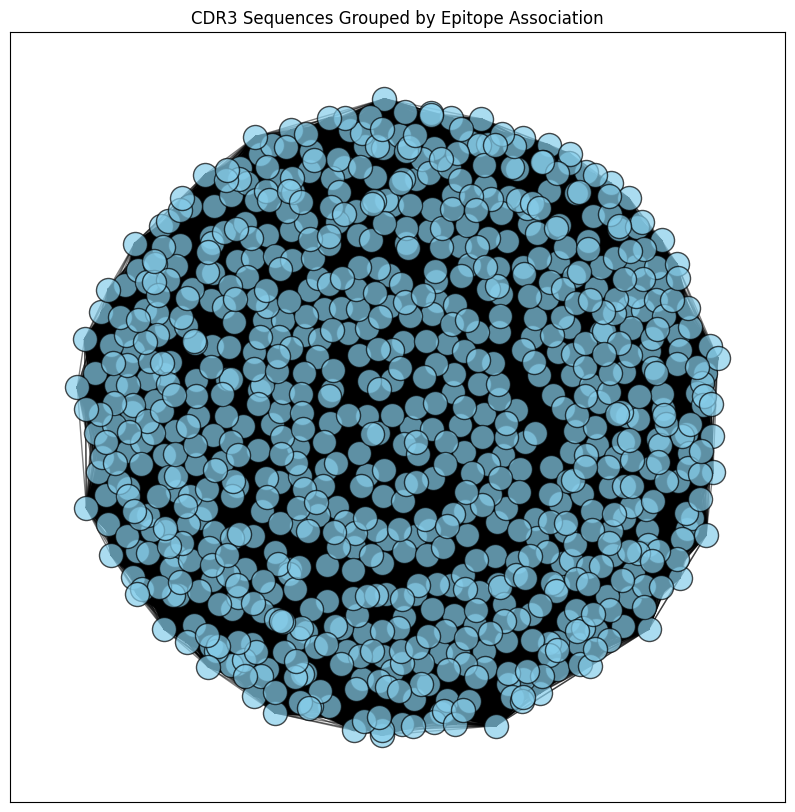

In [12]:
# Define positions using spring layout
pos = nx.spring_layout(G, k=0.3, iterations=20)  # Adjust k and seed for better visualization

# Draw the graph
plt.figure(figsize=(10, 10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue', alpha=0.7, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Show plot
plt.title('CDR3 Sequences Grouped by Epitope Association')
plt.show()


In [13]:

import networkx as nx
import pandas as pd
from pyvis.network import Network


df = pd.read_csv("output_files/tests/cdr3/predicted clusters.csv")
# Create a graph
G = nx.Graph()

# Add nodes to the graph
for cdr3 in df['cdr3'].unique():
    G.add_node(cdr3)

# Add edges between cdr3s that share the same epitope
for epitope in df['epitope.ham'].unique():
    cdr3s = df[df['epitope.ham'] == epitope]['cdr3']
    for i in range(len(cdr3s)):
        for j in range(i + 1, len(cdr3s)):
            G.add_edge(cdr3s.iloc[i], cdr3s.iloc[j])
G.remove_edges_from(nx.selfloop_edges(G))


# Create Network object
net = Network(notebook=True)

# Load networkx graph into pyvis
net.from_nx(G)

# Enable options for better visualization
net.show_buttons(filter_=['physics'])

# Save and display
# net.show('graph.html')
net.save_graph('output_files/ham_graph.html')

KeyboardInterrupt: 